In [1]:
#Calculating the escape fraction Epsilon as a function of Black Hole Mass
import matplotlib
#matplotlib.use('Agg')
import yt
import numpy as np
import sys
from scipy.signal import savgol_filter
import matplotlib.pyplot as plt
import glob
from yt.utilities.physical_constants import mh, mp, me, G, kboltz, pi
from math import pi
from yt.units.yt_array import YTQuantity, YTArray
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"],
    'font.size': 20})


In [2]:
def BondiRadius(M_BH, cs, v):
    R = G * M_BH / (cs*cs + v*v)
    return R

def MergerRate(M_BH, v_bh, cs, N_tot):
    sigma = BondiRadius(M_BH.in_units('g'), cs, v_bh) * BondiRadius(M_BH.in_units('g'), cs, v_bh) * np.pi
    merger_rate = N_tot * sigma * v_bh
    return merger_rate

def NewRadius(R_0, t, t_df):
    return(R_0 * np.exp(-t/(2*t_df)))


In [3]:
#Merger Rate of Heavy Seeds 
#This is a demo and just runs the calculation for 1 setup

R_0 = YTQuantity(200, 'pc') #Setting the radius of the inital black hole radius from centre
Num_HeavySeeds = 20             #masses > 1000 Msolar
M_BH = YTQuantity(1e4, 'msun')   #Peak heavy seed mass spectrum 10^4

#The background density is the total density (DM + gas + stars)
#For LeoI the total mass inside 1 kpc ~ 7 x 10^8 Msolar (i.e. pretty dense) so the density is 
#approximately 2e8 Msun/kpc^3. However, dynamical friction isn't as effective as this and 
#this has been realised when observing systems like Fornax etc. 
#Changing this value has a big impact on the dynamical friction timescale however and is the 
#single biggest driver. For LeoI the below value is probably ok I tink?

background_density = YTQuantity(4e6, 'Msun/kpc**3')
Temp = YTQuantity(10000, 'K')    #can vary (lower) this but 10000 K is reasonable
Gamma = 5.0/3.0
Mu = 1.22

tau_hubble = YTQuantity(13.8, 'Gyr') #age of Universe
f = 1e-4                          # fraction of volume filled with dense gas
soundspeed2 = Gamma*kboltz*Temp/(Mu*mh)
soundspeed = YTQuantity(np.sqrt(soundspeed2).d, 'cm/s')
cs = soundspeed
v_bh = cs
R_bondi = BondiRadius(M_BH.in_units('g'), cs, v_bh)


#1. What is the sinking time for a heavy seed?

t_df = YTQuantity(2 * (v_bh / YTQuantity(10, 'km/s')) * YTQuantity(2e7, 'Msun/kpc**3')/background_density * \
    YTQuantity(3e5, 'Msun')/M_BH, 'Gyr')

print("Dynamical Friction Time = ", t_df)

print("New Radius = ", NewRadius(R_0, tau_hubble, t_df))

new_radius = NewRadius(R_0, tau_hubble, t_df)
N_tot = Num_HeavySeeds/np.power(new_radius, 3.0)

print("N_tot number density = ", N_tot)

print("Ntot in Galaxy = ", N_tot*np.power(new_radius, 3.0))
print("Merger Rate = ", MergerRate(M_BH, v_bh, cs, N_tot).to("Gyr**-1"))

N_mm = N_tot * np.power(new_radius, 3.0) * MergerRate(M_BH, v_bh, cs, N_tot) * tau_hubble

#Total number of mergers in a Hubble Time
print("Total Number of Mergers in a Hubble Time = ", N_mm)
N_mm =  min(Num_HeavySeeds, N_mm)
epsilon = 1 - (N_mm / (N_tot * np.power(new_radius, 3.0)))

print("epsilon = ", epsilon)

Dynamical Friction Time =  318.4666401676374 Gyr
New Radius =  195.713341826821 pc
N_tot number density =  2.6678947829507007e-06 pc**(-3)
Ntot in Galaxy =  20.0 dimensionless
Merger Rate =  0.0033132091710672863 1/Gyr
Total Number of Mergers in a Hubble Time =  0.9144457312145706 dimensionless
epsilon =  0.9542777134392715 dimensionless


/home/regan/.local/lib/python3.9/site-packages/unyt/array.py:1778: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(
/home/regan/.local/lib/python3.9/site-packages/unyt/array.py:1778: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(
/home/regan/.local/lib/python3.9/site-packages/unyt/array.py:1778: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(
/home/regan/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/regan/.local/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/regan/.local/lib/python3.9/site-packages/unyt/array.py:1778: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(
/home/regan/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning

/home/regan/.local/lib/python3.9/site-packages/unyt/array.py:1778: RuntimeWarning: divide by zero encountered in true_divide
  out_arr = func(
/home/regan/.local/lib/python3.9/site-packages/unyt/array.py:1778: RuntimeWarning: invalid value encountered in multiply
  out_arr = func(
/home/regan/.local/lib/python3.9/site-packages/unyt/array.py:1778: RuntimeWarning: divide by zero encountered in true_divide
  out_arr = func(
/home/regan/.local/lib/python3.9/site-packages/unyt/array.py:1778: RuntimeWarning: invalid value encountered in multiply
  out_arr = func(
/home/regan/.local/lib/python3.9/site-packages/unyt/array.py:1778: RuntimeWarning: overflow encountered in multiply
  out_arr = func(
/home/regan/.local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/regan/.local/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars


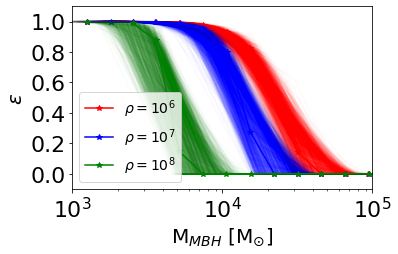

In [6]:
#And then run the same model in a Monte-Carlo fashion
#I select NUMBINS = 20 which determines the number of initial seeds


NUMBINS = 20
BinMasses = np.logspace(3, 6, NUMBINS)
np.random.seed(1311805)
TotalMassDensity = 1e8  #Msolar/kpc^3 - above this density we enter the GC region and hence LeoI must be below this!
    
def delta_bin(m, e):
    for i in range(NUMBINS-1):
        if(m > BinMasses[i] and m < BinMasses[i+1]):
            if(e < 0.0):
                continue
            Binned_Mass[i].append(int(m))
            Binned_Epsilon[i].append(e)
plt.figure()
prefactor = [1e-2, 1e-1, 1e0]

linecolors = ['red', 'blue', 'green']
meancolors = ['black', 'black', 'black']
labels = ['$\\rho = 10^6$', '$\\rho = 10^7$', '$\\rho = 10^8$']
for pf, color, color_mean, label in zip(prefactor, linecolors, meancolors, labels):
    background_density = YTQuantity(pf*TotalMassDensity, 'Msun/kpc**3')
    #Ok let's run a MC simulation
    #First up we need a normal distribution of heavy seed masses
    
    Binned_Mass = {}
    Binned_Epsilon = {}
    for i in range(NUMBINS):
        Binned_Mass[i] = []
        Binned_Epsilon[i] = []
    for i in range(1500):
        #Set up a normal (in log10 space) distribution. Set the mean at 2e4 with a standard deviation of 0.45 ish
        mu, sigma = 4.2, 0.45 # mean and standard deviation
        #mu, sigma = 4.9, 0.35 # mean and standard deviation
        s = np.random.normal(mu, sigma, 100)


        masses = np.power(10, s)
   
        #To do this I recreate the above histogram without normalising
        #and I divide into 6 bins
        count, bins, ignored = plt.hist(s, 6, density=False)
  
        massbins = np.power(10, bins[1::])
        DyTime = []
        Epsilon = []
        Masses = []

        for M_BH, Num_HeavySeeds in zip(massbins, count):
            M_BH = YTQuantity(M_BH, 'Msun')
        
            t_df = YTQuantity(2 * (v_bh / YTQuantity(10, 'km/s')) * YTQuantity(3e6, 'Msun/kpc**3')/background_density * \
            YTQuantity(3e5, 'Msun')/M_BH, 'Gyr')
        
            DyTime.append(t_df)
            new_radius = NewRadius(R_0, tau_hubble, t_df)
            N_tot = Num_HeavySeeds/np.power(new_radius, 3.0)

            N_mm = N_tot * np.power(new_radius, 3.0) * MergerRate(YTQuantity(M_BH, 'Msun'), v_bh, cs, N_tot) * tau_hubble
    

            #Total number of mergers in a Hubble Time
            #print("Total Number of Mergers in a Hubble Time = ", N_mm)
            N_mm =  min(Num_HeavySeeds, N_mm)
            epsilon = 1 - (N_mm / (N_tot * np.power(new_radius, 3.0)))
            Epsilon.append(epsilon.v)
        
            delta_bin(M_BH.v, epsilon.v)
 
        plt.semilogx(massbins, Epsilon, color=color, alpha=0.025)
        
    FinalM = []
    FinalE = []
    for i in range(NUMBINS):
        FinalM.append(np.mean(np.asarray(Binned_Mass[i])))
        FinalE.append(np.mean(np.asarray(Binned_Epsilon[i])))
    #print("FinalM = ", FinalM)
    #print("FinalE = ", FinalE)
    plt.semilogx(FinalM, FinalE, marker="*", color=color, label=label)
    plt.legend(loc='best', fontsize=14)
plt.xlabel("M$_{MBH}$ [M$_{\odot}$]", fontsize="20")
plt.ylabel("$\epsilon$", fontsize="20")
plt.xlabel(r"$M_\mathrm{MBH} \,[M_\odot]$", fontsize="20")
plt.ylabel(r"$\epsilon$", fontsize="20")
plt.xlim(1e3, 1e5)
plt.ylim(-0.1,1.1)
plt.yticks((0.0, 0.2, 0.4, 0.6, 0.8, 1.0), fontsize='20')
plt.xticks((1e3, 1e4, 1e5), fontsize='20')
plt.tight_layout()
plt.savefig("EpsilonVsMass_MC.pdf", bbox_inches = 'tight', pad_inches = 0)

